# **LinkedIn Job Profile Recommendation System**

## **Data Scraping**

In [1]:
import requests
from bs4 import BeautifulSoup
import random 
import pandas as pd

In [3]:
list_url = "https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=&location=India&start=900" 

response = requests.get(list_url)

list_data = response.text
list_soup = BeautifulSoup(list_data, "html.parser")
page_jobs = list_soup.find_all("li")

In [5]:
id_list = []

In [7]:
for job in page_jobs:
    base_card_div = job.find("div",{"class":"base-card"})
    job_id = base_card_div.get("data-entity-urn").split(":")[3]
    print(job_id)
    id_list.append(job_id)

4212173145
4211514821
4211152812
4212313122
4212913096
4212313634
4212986883
4212959532
4211513189
4211481002


In [9]:
id_list

['4212173145',
 '4211514821',
 '4211152812',
 '4212313122',
 '4212913096',
 '4212313634',
 '4212986883',
 '4212959532',
 '4211513189',
 '4211481002']

In [11]:
job_list = []

for job_id in id_list:
    job_url = f"https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{job_id}"
    job_response = requests.get(job_url)
    print(job_response.status_code)
    job_soup = BeautifulSoup(job_response.text,"html.parser")
    job_post = {}
    try:
        job_post["Job_Name"] = job_soup.find("h2",{"class" : "top-card-layout__title font-sans text-lg papabear:text-xl font-bold leading-open text-color-text mb-0 topcard__title"}).text.strip()
    except:
        job_post["Job_Name"] = None
    try:
        job_post["Company_Name"] = job_soup.find("a",{"class" : "topcard__org-name-link topcard__flavor--black-link"}).text.strip()
    except:
        job_post["Company_Name"] = None
    try:
        job_post["Time_Posted"] = job_soup.find("span",{"class" : "posted-time-ago__text topcard__flavor--metadata"}).text.strip()
    except:
        job_post["Time_Posted"] = None
    try:
        job_post["Applicants"] = job_soup.find("span",{"class" : "num-applicants__caption"}).text.strip()
    except:
        job_post["Applicants"] = None
    try:
        job_post["Location"] = job_soup.find("span",{"class" : "topcard__flavor topcard__flavor--bullet"}).text.strip()
    except:
        job_post["Location"] = None
    try:
        criteria_items = job_soup.find_all("li", {"class": "description__job-criteria-item"})
        
        for item in criteria_items:
            subheader = item.find("h3", {"class": "description__job-criteria-subheader"})
            if subheader and "Employment type" in subheader.text:
                job_post["Job_Type"] = item.find("span", {"class": "description__job-criteria-text"}).text.strip()
                break  
            else:
                job_post["Job_Type"] = None 
    except:
        job_post["Job_Type"] = None
    
    
    
    job_list.append(job_post)

200
200
200
200
200
200
200
200
200
200


In [12]:
job_list

[{'Job_Name': 'Director of Product Management',
  'Company_Name': 'ekincare',
  'Time_Posted': '1 day ago',
  'Applicants': None,
  'Location': 'Hyderabad, Telangana, India',
  'Job_Type': 'Full-time'},
 {'Job_Name': 'Data Analyst',
  'Company_Name': 'Optimum Data Analytics',
  'Time_Posted': None,
  'Applicants': '92 applicants',
  'Location': 'Bengaluru, Karnataka, India',
  'Job_Type': 'Full-time'},
 {'Job_Name': 'Product Designer',
  'Company_Name': 'BlueOptima',
  'Time_Posted': '1 day ago',
  'Applicants': '71 applicants',
  'Location': 'Bengaluru East, Karnataka, India',
  'Job_Type': 'Full-time'},
 {'Job_Name': 'Technology Operations Lead',
  'Company_Name': 'Deutsche Bank',
  'Time_Posted': '1 day ago',
  'Applicants': '36 applicants',
  'Location': 'Pune, Maharashtra, India',
  'Job_Type': 'Full-time'},
 {'Job_Name': 'Associate',
  'Company_Name': 'PwC',
  'Time_Posted': None,
  'Applicants': None,
  'Location': 'Mumbai, Maharashtra, India',
  'Job_Type': 'Full-time'},
 {'Job

In [15]:
jobs_df = pd.DataFrame(job_list)
jobs_df

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Director of Product Management,ekincare,1 day ago,None,"Hyderabad, Telangana, India",Full-time
1,Data Analyst,Optimum Data Analytics,None,92 applicants,"Bengaluru, Karnataka, India",Full-time
2,Product Designer,BlueOptima,1 day ago,71 applicants,"Bengaluru East, Karnataka, India",Full-time
3,Technology Operations Lead,Deutsche Bank,1 day ago,36 applicants,"Pune, Maharashtra, India",Full-time
4,Associate,PwC,None,None,"Mumbai, Maharashtra, India",Full-time
5,"Team Lead - Intern, INSC North",Amazon,1 day ago,None,"Gurgaon, Haryana, India",Full-time
6,Project Associate,Indegene,None,None,"Bengaluru, Karnataka, India",Full-time
7,Executive N - Retail Sales,Asian Paints,None,None,"Karimnagar, Telangana, India",Full-time
8,Freelance UGC Creator,White Panda,None,None,"Hyderabad, Telangana, India",Part-time
9,Client Service Support Specialist,JPMorganChase,2 days ago,139 applicants,"Mumbai, Maharashtra, India",Full-time


In [9]:
jobs_df.to_csv('E:\Data Science\Project\LinkedIn\LinkedIn_Scrap_Data.csv', index = False)

### **Import Library**

In [17]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

### **Import Data**

In [20]:
df = pd.read_csv(r'LinkedIn_Job_Data.csv', encoding='latin1')
df

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2 hours ago,55 applicants,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2 hours ago,114 applicants,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15 hours ago,183 applicants,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18 hours ago,55 applicants,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18 hours ago,26 applicants,"Bengaluru East, Karnataka, India",Full-time
...,...,...,...,...,...,...
3000,"Scientist in Residence, Amazon",Amazon,1 week ago,NaN,"Delhi, Delhi, India",Full-time
3001,AI/ML Engineers in India | 40 hours a week,Braintrust,2 weeks ago,NaN,"Maharashtra, India",Full-time
3002,Senior Data Analyst,Zupee,2 weeks ago,NaN,"Gurugram, Haryana, India",Part-time
3003,"AI ML Engineer - Deep Learning (LLM, LSTM, Neu...",SOLIZE India Technologies Private Limited,1 week ago,60 applicants,"Bengaluru, Karnataka, India",Full-time


### **Data Preparation**

In [23]:
df.head()

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2 hours ago,55 applicants,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2 hours ago,114 applicants,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15 hours ago,183 applicants,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18 hours ago,55 applicants,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18 hours ago,26 applicants,"Bengaluru East, Karnataka, India",Full-time


In [25]:
df.shape

(3005, 6)

#### There are 3005 rows and 6 features in our dataset.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job_Name      3005 non-null   object
 1   Company_Name  3005 non-null   object
 2   Time_Posted   2271 non-null   object
 3   Applicants    2008 non-null   object
 4   Location      3005 non-null   object
 5   Job_Type      2173 non-null   object
dtypes: object(6)
memory usage: 141.0+ KB


In [30]:
df.dtypes

Job_Name        object
Company_Name    object
Time_Posted     object
Applicants      object
Location        object
Job_Type        object
dtype: object

#### All the 6 features having " object " data type.

In [33]:
df.describe()

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
count,3005,3005,2271,2008,3005,2173
unique,1601,1040,57,197,181,4
top,Data Analyst,Tata Consultancy Services,1 day ago,200,"Bengaluru, Karnataka, India",Full-time
freq,119,79,289,99,751,1487


#### The dataset has 1,601 unique jobs, 1,040 unique companies, and 181 unique locations

In [36]:
df.isnull().sum()

Job_Name          0
Company_Name      0
Time_Posted     734
Applicants      997
Location          0
Job_Type        832
dtype: int64

#### There are 3 columns in null values present in dataset so we remove the rows containing null values.

### **Handling Missing Values**

In [40]:
df.dropna(inplace = True)
print(df.isnull().sum())

Job_Name        0
Company_Name    0
Time_Posted     0
Applicants      0
Location        0
Job_Type        0
dtype: int64


In [42]:
df.shape

(1878, 6)

#### After removing the null values, there are 1878 rows are there.

### **Removing Duplicate Values**

In [46]:
df1 = df.dropna().reset_index(drop = True)
df1

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2 hours ago,55 applicants,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2 hours ago,114 applicants,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15 hours ago,183 applicants,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18 hours ago,55 applicants,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18 hours ago,26 applicants,"Bengaluru East, Karnataka, India",Full-time
...,...,...,...,...,...,...
1873,"Head of Generative AI Specialist, Blackbelt, G...",Google,1 week ago,38 applicants,"Bengaluru, Karnataka, India",Full-time
1874,AI/ML Engineer,Maieutic Semiconductors,3 days ago,35 applicants,"Bengaluru, Karnataka, India",Full-time
1875,Data Analyst - Product Analytics,Thomson Reuters,3 days ago,119 applicants,"Bengaluru, Karnataka, India",Full-time
1876,"AI ML Engineer - Deep Learning (LLM, LSTM, Neu...",SOLIZE India Technologies Private Limited,1 week ago,60 applicants,"Bengaluru, Karnataka, India",Full-time


In [48]:
df1[df1.duplicated()]

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
1844,Product Analyst,HireQuotient,3 weeks ago,95 applicants,"Bengaluru, Karnataka, India",Full-time
1847,Director Data Science,Sigmoid,3 weeks ago,157 applicants,"Bengaluru, Karnataka, India",Full-time
1849,"Head of Generative AI Specialist, Blackbelt, G...",Google,1 week ago,38 applicants,"Bengaluru, Karnataka, India",Full-time
1855,Engineer - Customer Service,Gunnebo Entrance Control,2 days ago,42 applicants,"Gurugram, Haryana, India",Full-time
1856,Contract Engineer,Larsen & Toubro,1 day ago,102 applicants,"Vadodara, Gujarat, India",Full-time
1857,Java Developer (Backend developer),KBC Technologies Group,3 days ago,33 applicants,"Chennai, Tamil Nadu, India",Full-time
1858,Java Developer,HighRadius,3 days ago,107 applicants,"Hyderabad, Telangana, India",Full-time
1859,Chief Engineer,Pullman Hotels & Resorts,5 days ago,48 applicants,"Delhi, Delhi, India",Full-time
1860,Senior Engineer,Deutsche Bank,1 day ago,46 applicants,"Pune, Maharashtra, India",Full-time
1861,Senior Java Software Engineer,Blue Spire Inc,2 days ago,158 applicants,"Hyderabad, Telangana, India",Full-time


In [50]:
df1[df1.duplicated()].shape

(25, 6)

#### There are 25 duplicate rows present

In [53]:
df2 = df1.drop_duplicates()
df2

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2 hours ago,55 applicants,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2 hours ago,114 applicants,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15 hours ago,183 applicants,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18 hours ago,55 applicants,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18 hours ago,26 applicants,"Bengaluru East, Karnataka, India",Full-time
...,...,...,...,...,...,...
1851,Assistant Manager,BNP Paribas CIB,1 day ago,132 applicants,"Mumbai, Maharashtra, India",Full-time
1852,Finance Intern,The Muthoot Group,1 day ago,157 applicants,"Belagavi, Karnataka, India",Internship
1853,Sales Advisor,H&M,2 days ago,66 applicants,"Indore, Madhya Pradesh, India",Full-time
1854,RP Sanjiv Goenka Group - Senior Manager - Pack...,RPSG (FMCG) - Guiltfree Industries Limited,2 days ago,50 applicants,"Kolkata, West Bengal, India",Full-time


#### After removing the duplicated rows, there are 1853 rows are there.

In [56]:
df2 = df2[df2['Location'] != 'India']
df2

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2 hours ago,55 applicants,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2 hours ago,114 applicants,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15 hours ago,183 applicants,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18 hours ago,55 applicants,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18 hours ago,26 applicants,"Bengaluru East, Karnataka, India",Full-time
...,...,...,...,...,...,...
1851,Assistant Manager,BNP Paribas CIB,1 day ago,132 applicants,"Mumbai, Maharashtra, India",Full-time
1852,Finance Intern,The Muthoot Group,1 day ago,157 applicants,"Belagavi, Karnataka, India",Internship
1853,Sales Advisor,H&M,2 days ago,66 applicants,"Indore, Madhya Pradesh, India",Full-time
1854,RP Sanjiv Goenka Group - Senior Manager - Pack...,RPSG (FMCG) - Guiltfree Industries Limited,2 days ago,50 applicants,"Kolkata, West Bengal, India",Full-time


### **Data Visualization**

In [59]:
company_count = df2['Company_Name'].value_counts()
company_count

Company_Name
Tata Consultancy Services         56
Wipro                             55
Accenture in India                42
Capgemini                         41
Cognizant                         29
                                  ..
Sato Inc                           1
GE Appliances, a Haier company     1
LearningMate                       1
Toolyt                             1
Thomson Reuters                    1
Name: count, Length: 756, dtype: int64

In [61]:
company_count.shape

(756,)

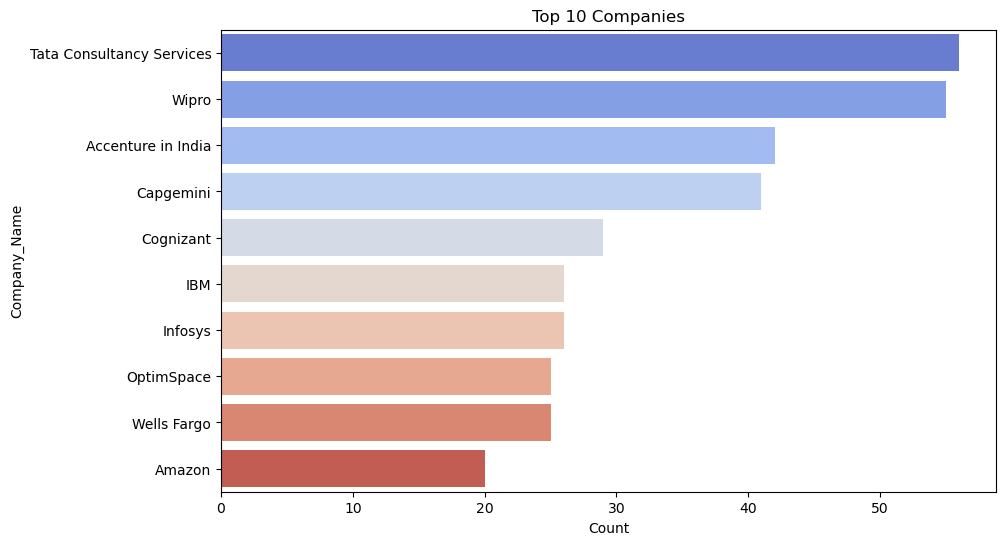

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(y = df2['Company_Name'],order = df2['Company_Name'].value_counts().index[:10],palette = 'coolwarm')
plt.title("Top 10 Companies")
plt.xlabel("Count")
plt.ylabel("Company_Name")
plt.show()

#### There are "Tata Consultancy Services" is the largest company among the Top 10 companies

In [66]:
jobname_count = df2['Job_Name'].value_counts()
jobname_count

Job_Name
Data Analyst                                       60
Data Analyst Intern                                23
Java Developer                                     14
Senior Data Analyst                                13
Python Developer                                   12
                                                   ..
Software Developer                                  1
Social Media Marketing Manager in Mumbai            1
Civil Site Engineer Freshers                        1
Senior Business Develeopment Manager - Lonavala     1
Data Analyst - Product Analytics                    1
Name: count, Length: 1177, dtype: int64

In [68]:
jobname_count.shape

(1177,)

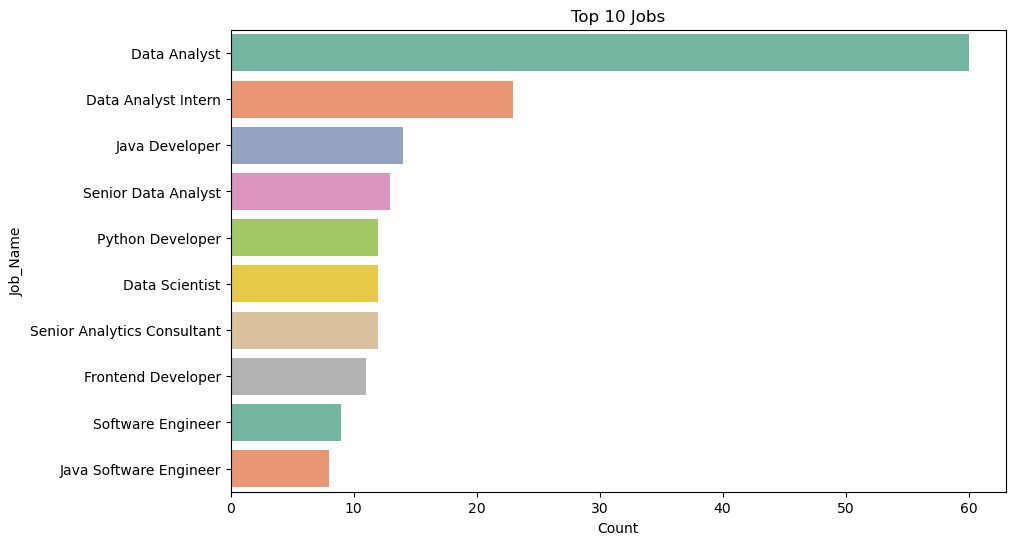

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(y = df2['Job_Name'],order = df2['Job_Name'].value_counts().index[:10],palette = 'Set2')
plt.title("Top 10 Jobs")
plt.xlabel("Count")
plt.ylabel("Job_Name")
plt.show()

#### There are "Data Analyst" is the highest jobs among the Top 10 Jobs

In [73]:
loc_count = df2['Location'].value_counts()
loc_count

Location
Bengaluru, Karnataka, India                  461
Hyderabad, Telangana, India                  172
Pune, Maharashtra, India                     145
Mumbai, Maharashtra, India                   135
Chennai, Tamil Nadu, India                   113
                                            ... 
Mysore, Karnataka, India                       1
Haryana, India                                 1
Gautam Buddha Nagar, Uttar Pradesh, India      1
Hanamakonda, Telangana, India                  1
Belagavi, Karnataka, India                     1
Name: count, Length: 139, dtype: int64

In [75]:
loc_count.shape

(139,)

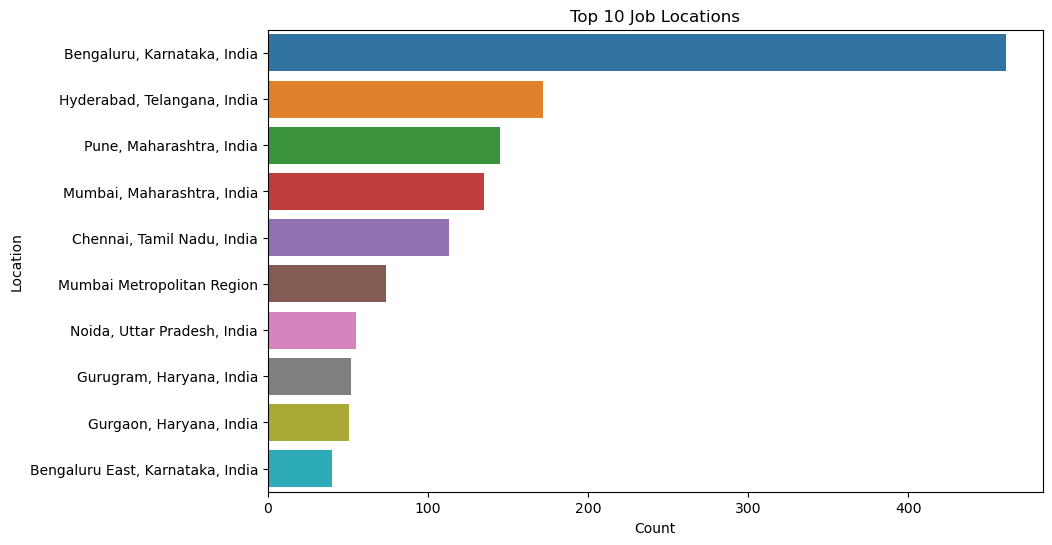

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(y = df2['Location'],order = df2['Location'].value_counts().index[:10],palette = 'tab10')
plt.title("Top 10 Job Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

#### There are "Bengaluru, Karnataka, India" location has more jobs among the Top 10 job locations

In [86]:
jobtype_count = df2['Job_Type'].value_counts()
jobtype_count

Job_Type
Full-time     1376
Part-time      221
Contract       105
Internship     103
Name: count, dtype: int64

In [88]:
jobtype_count.shape

(4,)

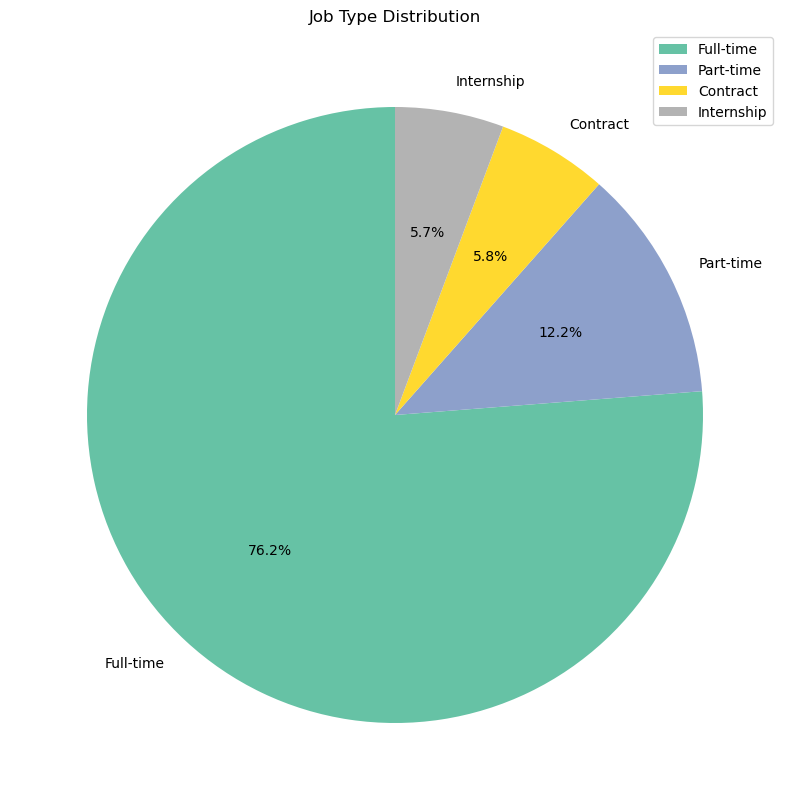

In [90]:
plt.figure(figsize=(10, 10))
df2['Job_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', legend=True)
plt.title("Job Type Distribution")
plt.ylabel('')  
plt.show()

#### There are most "Full-time" jobs in this Job Type

In [93]:
df3=df2.copy()
df3.head()

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2 hours ago,55 applicants,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2 hours ago,114 applicants,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15 hours ago,183 applicants,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18 hours ago,55 applicants,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18 hours ago,26 applicants,"Bengaluru East, Karnataka, India",Full-time


### **Data Preprocessing**

In [96]:
df4 = df3.copy()
df4.head()

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2 hours ago,55 applicants,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2 hours ago,114 applicants,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15 hours ago,183 applicants,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18 hours ago,55 applicants,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18 hours ago,26 applicants,"Bengaluru East, Karnataka, India",Full-time


In [98]:
df4['Applicants'] = df4['Applicants'].astype(str).str.extract(r'(\d+)')[0].astype(float)

In [100]:
df4['Time_Posted'] = df4['Time_Posted'].str.extract(r'(\d+)')[0].astype(float)
df4.loc[df4["Time_Posted"].astype(str).str.contains("day", na=False), "Time_Posted"] *= 24

In [102]:
df4.head()

,Job_Name,Company_Name,Time_Posted,Applicants,Location,Job_Type
0,Opening for Java Full Stack Developer,LTIMindtree,2.0,55.0,"Pune, Maharashtra, India",Full-time
1,Senior Engineer Ã¢ÂÂ Backend (Java),PayPal,2.0,114.0,"Bengaluru, Karnataka, India",Full-time
2,Sr. Software Engineer,Tech Mahindra,15.0,183.0,"Bengaluru, Karnataka, India",Contract
3,Full Stack Developer JAVA,Oracle,18.0,55.0,"Bengaluru, Karnataka, India",Full-time
4,Senior Java Software Engineer,idigilogic,18.0,26.0,"Bengaluru East, Karnataka, India",Full-time


In [104]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1805 entries, 0 to 1875
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Job_Name      1805 non-null   object 
 1   Company_Name  1805 non-null   object 
 2   Time_Posted   1805 non-null   float64
 3   Applicants    1805 non-null   float64
 4   Location      1805 non-null   object 
 5   Job_Type      1805 non-null   object 
dtypes: float64(2), object(4)
memory usage: 98.7+ KB


### **Feature Scaling & Encoding**

In [107]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [109]:
cat_features = ['Job_Name', 'Company_Name', 'Location', 'Job_Type']
num_features = ['Time_Posted', 'Applicants']

In [111]:
encoder = OrdinalEncoder()
df4[cat_features] = encoder.fit_transform(df4[cat_features])

### **Train-Test Split and Scaling Numerical Features**

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [116]:
X = df4[cat_features + num_features]
y = df4['Applicants']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

### **Hyperparameter Tuning and Model Prediction**

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Linear Regression

In [124]:
lr = LinearRegression()
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [126]:
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='r2', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [128]:
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

### RandomForestRegressor

In [131]:
rfr = RandomForestRegressor()

param_grid_rfr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [133]:
grid_search_rfr = GridSearchCV(rfr, param_grid_rfr, cv=5, scoring='r2', n_jobs=-1)
grid_search_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [134]:
best_rfr = grid_search_rfr.best_estimator_
y_pred_rfr = best_rfr.predict(X_test)

### GradientBoostingRegressor

In [136]:
gbr = GradientBoostingRegressor()

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [137]:
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='r2', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [142]:
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

### **Model Evaluation**

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [147]:
y_pred_lr = best_lr.predict(X_test)
y_pred_rfr = best_rfr.predict(X_test)
y_pred_gbr = best_gbr.predict(X_test)

In [149]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': model_name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

metrics_lr = evaluate_model(y_test, y_pred_lr, 'Linear Regression')
metrics_rfr = evaluate_model(y_test, y_pred_rfr, 'Random Forest')
metrics_gbr = evaluate_model(y_test, y_pred_gbr, 'Gradient Boosting')

all_metrics = pd.DataFrame([metrics_lr, metrics_rfr, metrics_gbr])
display(all_metrics)

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,2.497390e-25,4.997389e-13,4.420914e-13,1.000000
1,Random Forest,2.020792e+01,4.495322e+00,2.858965e+00,0.993828
2,Gradient Boosting,8.343200e-03,9.134112e-02,9.697159e-03,0.999997


#### Linear Regression and Gradient Boosting give very accurate results, while Random Forest is a little less accurate.

### **Job Recommendation**

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display

In [155]:
df3['Job_Name'] = df3['Job_Name'].fillna('').astype(str)
df3['Location'] = df3['Location'].fillna('').astype(str)

In [157]:
# Feature Engineering
tfidf = TfidfVectorizer(stop_words='english')
df3['Job_Name'] = df3['Job_Name'].fillna('')
df3['Location'] = df3['Location'].fillna('')
tfidf_matrix_jobs = tfidf.fit_transform(df3['Job_Name'])
tfidf_matrix_locations = tfidf.fit_transform(df3['Location'])

In [159]:
# Compute Cosine Similarity Separately
cosine_sim_jobs = cosine_similarity(tfidf_matrix_jobs, tfidf_matrix_jobs)
cosine_sim_locations = cosine_similarity(tfidf_matrix_locations, tfidf_matrix_locations)

In [161]:
def recommend_jobs(job_title, location, top_n=3):
    job_idx = df3[df3['Job_Name'].str.contains(job_title, case=False, na=False)].index
    location_idx = df3[df3['Location'].str.contains(location, case=False, na=False)].index
    
    if len(job_idx) == 0 or len(location_idx) == 0:
        return "No job found!"

    job_idx = job_idx[0]
    location_idx = location_idx[0]

    job_sim_scores = list(enumerate(cosine_sim_jobs[job_idx]))
    location_sim_scores = list(enumerate(cosine_sim_locations[location_idx]))

    # Combine Similarity Scores (Job + Location)
    combined_scores = {i[0]: i[1] for i in job_sim_scores}
    for loc in location_sim_scores:
        if loc[0] in combined_scores:
            combined_scores[loc[0]] += loc[1]  # Add scores

    # Sort by Best Matches
    sorted_jobs = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[1:top_n+1]
    job_indices = [i[0] for i in sorted_jobs]

    return df3.iloc[job_indices][['Job_Name', 'Company_Name', 'Location', 'Job_Type', 'Applicants', 'Time_Posted']]

In [163]:
job_dropdown = widgets.Dropdown(
    options=df3['Job_Name'].unique(),
    description="Job Name:",
    disabled=False,
)

location_dropdown = widgets.Dropdown(
    options=df3['Location'].unique(),
    description="Location:",
    disabled=False,
)

output = widgets.Output()

In [165]:
def on_submit(change):
    with output:
        output.clear_output()  
        user_job = job_dropdown.value
        user_location = location_dropdown.value
        recommended_jobs = recommend_jobs(user_job, user_location)
        display(recommended_jobs)

job_dropdown.observe(on_submit, names='value')
location_dropdown.observe(on_submit, names='value')

In [167]:
display(job_dropdown, location_dropdown, output)

Dropdown(description='Job Name:', options=('Opening for Java Full Stack Developer', 'Senior Engineer Ã¢Â\x80Â\…

Dropdown(description='Location:', options=('Pune, Maharashtra, India', 'Bengaluru, Karnataka, India', 'Bengalu…

Output()

#### There are recommended three similar jobs